## Polytope Climate-DT example notebook

This notebook shows how to use earthkit-data and earthkit-maps to pull destination-earth data from LUMI and plot it using earthkit-maps on a domain.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this.

You will need your credentials to be set up via config file (~/.polytopeapirc) or by environment variables

In [1]:
{
    "user_email": "<user_email>",
    "user_key": "<user_key",
}

{'user_email': '<user_email>', 'user_key': '<user_key'}

You can also set POLYTOPE_USER_EMAIL and POLYTOPE_USER_KEY in your environment. Note that the email is not required if using a token-based authentication.

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-maps
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [2]:
import earthkit.data
import earthkit.maps
import earthkit.regrid

# This request matches multiple parameter of the climate DT

request = {
    'activity': 'ScenarioMIP',
    'class': 'd1',
    'dataset': 'climate-dt',
    'date': '20200102',
    'experiment': 'SSP3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'IFS-NEMO',
    'param': '134/165/166',
    'realization': '1',
    'resolution': 'standard',
    'stream': 'clte',
    'time': '0100', # '0100/0200/0300/0400/0500/0600'
    'type': 'fc'
}

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


2024-05-14 15:30:23 - INFO - Key read from /Users/maaw/.polytopeapirc
2024-05-14 15:30:23 - INFO - Sending request...
{'request': 'activity: ScenarioMIP\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20200102'\n"
            'experiment: SSP3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            'param: 134/165/166\n'
            "realization: '1'\n"
            'resolution: standard\n'
            'stream: clte\n'
            "time: '0100'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-05-14 15:30:23 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 15:30:25 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/cb7e42bc-0f06-4912-aa5f-232f12fd0313 for status
2024-05-14 15:30:25 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 15:30:25 - INFO - Checkin

cb7e42bc-0f06-4912-aa5f-232f12fd0313:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

In [3]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,fc,None,healpix
1,ecmf,10u,heightAboveGround,10,20200102,100,0,fc,None,healpix
2,ecmf,10v,heightAboveGround,10,20200102,100,0,fc,None,healpix


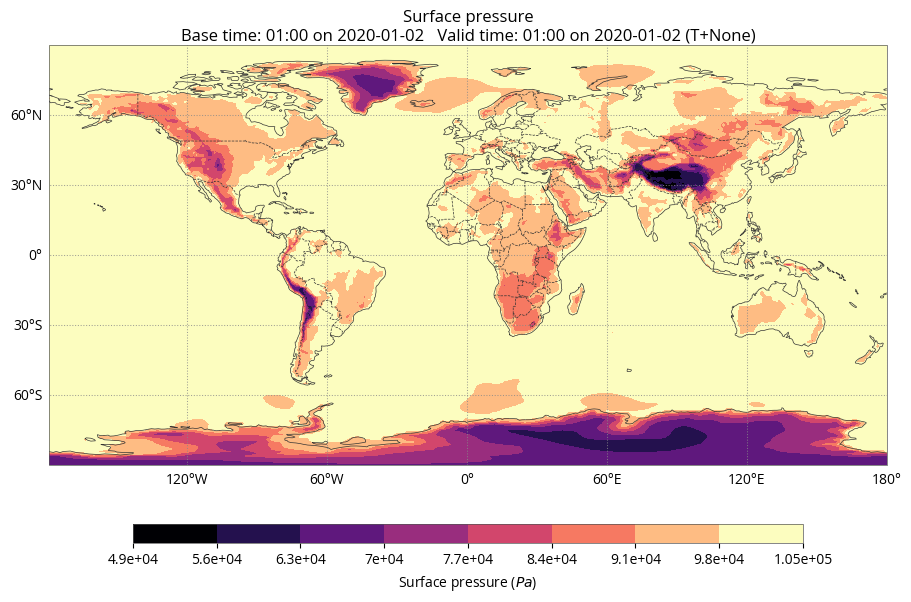

In [4]:
earthkit.maps.quickplot(data[0])

In [5]:
# Regrid t=from healpix for conversion to xarray
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")
# Convert data to xarray
data_latlon.to_xarray()

<xarray.Dataset> Size: 786kB
Dimensions:            (time: 1, step: 1, surface: 1, latitude: 181,
                        longitude: 360, heightAboveGround: 1)
Coordinates:
  * time               (time) datetime64[ns] 8B 2020-01-02T01:00:00
  * step               (step) timedelta64[ns] 8B 00:00:00
  * surface            (surface) float64 8B 0.0
  * latitude           (latitude) float64 1kB 90.0 89.0 88.0 ... -89.0 -90.0
  * longitude          (longitude) float64 3kB 0.0 1.0 2.0 ... 357.0 358.0 359.0
    valid_time         (time, step) datetime64[ns] 8B ...
  * heightAboveGround  (heightAboveGround) float64 8B 10.0
Data variables:
    sp                 (time, step, surface, latitude, longitude) float32 261kB ...
    u10                (time, step, heightAboveGround, latitude, longitude) float32 261kB ...
    v10                (time, step, heightAboveGround, latitude, longitude) float32 261kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          1003
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-05-14T15:15 GRIB to CDM+CF via cfgrib-0.9.1...

Now we will plot a specific area using earthkit-maps. In this case we will plot the data we have retrieved over Europe.

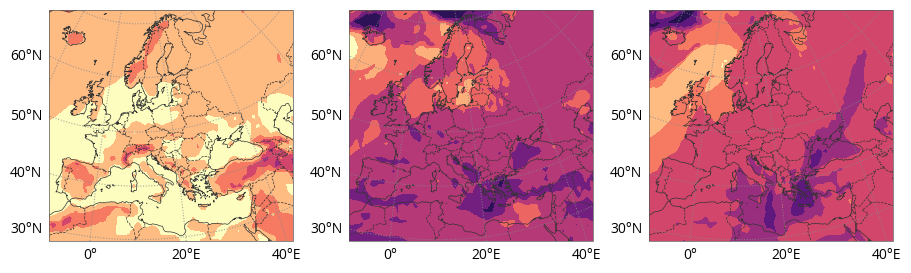

In [6]:
chart = earthkit.maps.Chart(domain="Europe")

chart.coastlines()
chart.land()
chart.borders()
chart.gridlines()
chart.plot(data)

chart.show()